In [ ]:
#Reading data from csv and selecting first 10 data 
import pandas as pd
Sales = pd.read_csv('sales(1).csv')
Sales.head(10)

In [6]:
# categorising data
Sales['Invoice ID']

0      460489604
1      471006167
2      411909258
3      487313402
4      197763430
         ...    
995    818829599
996    556589713
997     82324424
998    783661702
999    759171975
Name: Invoice ID, Length: 1000, dtype: int64

In [8]:
#labelling unique entities
Sales['Category'].unique()

array(['Groceries', 'Fashion', 'Clothing', 'Sporting', 'Books',
       'Furniture'], dtype=object)

In [9]:
#Finding desired customer record
Sales.iloc[200]

Invoice ID      576523018
Date            2/15/2018
Time                12:35
Gender               Male
Location      Water tower
City              Chicago
Member                 No
Category        Groceries
Price                  82
Quantity                1
Total                  82
Payment              Card
Rating                  4
Name: 200, dtype: object

In [10]:
Sales[200:210]

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
200,576523018,2/15/2018,12:35,Male,Water tower,Chicago,No,Groceries,82,1,82,Card,4
201,414119922,1/30/2018,11:07,Male,Water tower,Chicago,No,Sporting,44,7,308,Card,3
202,123247697,2/8/2018,20:03,Male,Brookfield,NewYork,No,Groceries,22,7,154,Card,5
203,40419058,1/26/2018,14:53,Male,Water tower,Chicago,Yes,Books,95,6,570,Card,1
204,890497298,2/25/2018,18:06,Female,Water tower,Chicago,No,Clothing,69,2,138,Cash,2
205,885702268,1/28/2018,12:45,Male,Brookfield,NewYork,No,Groceries,89,6,534,Card,1
206,172252194,3/22/2018,20:10,Female,Park lane,Dallas,No,Books,41,6,246,Card,4
207,866140211,2/25/2018,13:34,Female,Park lane,Dallas,No,Clothing,54,6,324,Gpay,4
208,597678548,3/15/2018,17:35,Male,Water tower,Chicago,Yes,Sporting,34,3,102,Cash,1
209,428818456,2/25/2018,18:50,Male,Park lane,Dallas,Yes,Books,94,5,470,Cash,2


In [ ]:
#conditional format where customers==male
Sales[Sales['Gender']=='Male'].head(10)

In [ ]:
Sales[Sales['Total']>100]

In [15]:
#unique sales payment
Sales['Payment'].unique()

array(['Cash', 'Card', 'Gpay'], dtype=object)

In [16]:
#Adding multiple conditions using query method
Sales.query('100<Total<200')


,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
7,188869875,3/8/2018,13:24,Male,Park lane,Dallas,No,Books,80,2,160,Cash,3
9,562942936,2/24/2018,16:05,Female,Park lane,Dallas,No,Books,80,2,160,Cash,4
10,388412668,2/26/2018,11:32,Female,Brookfield,NewYork,No,Furniture,35,4,140,Gpay,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,614557665,3/22/2018,17:16,Female,Park lane,Dallas,No,Clothing,49,3,147,Cash,5
981,418253101,3/14/2018,12:25,Female,Brookfield,NewYork,No,Fashion,81,2,162,Gpay,5
989,941364541,3/13/2018,14:53,Female,Brookfield,NewYork,No,Sporting,19,7,133,Cash,1
994,446582560,1/31/2018,19:00,Male,Water tower,Chicago,No,Fashion,29,5,145,Cash,4


In [ ]:
Sales.query('Payment=="Cash" &  City== "NewYork" & Total<50')

import pandas as pd
Sales = pd.read_csv('sales(1).csv')
Sales.head(10)

Sales.sum()['Total']

Sales.sum()['Quantity']

# the user who spend highest amount
Sales.max()['Total']
Sales[Sales['Total']==Sales.max()['Total']]

# average purchase by user
Sales.mean()['Total']

# using groupby to group data by location and date
Sales.groupby('City').sum()['Total']

Sales.groupby('Date').sum()['Total']

# Answering question about the branch
# which loaction has highest and lowest sales
# represent the sales on a bar chart also show the market share for each location using pie chart


In [20]:
location_list = Sales.groupby('Location')
location = [x for x,y in location_list]
location

['Brookfield', 'Park lane', 'Water tower']

In [21]:
Sales.groupby('Location').sum()['Total']

Location
Brookfield     72141
Park lane      70432
Water tower    65215
Name: Total, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<BarContainer object of 3 artists>

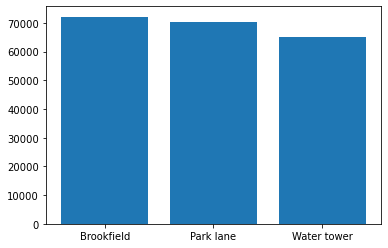

In [22]:
import matplotlib.pyplot as plt
plt.bar(location,Sales.groupby('Location').sum()['Total'])
plt.show()

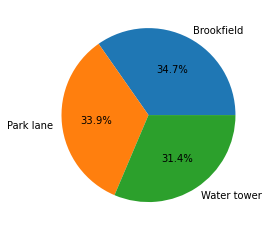

In [28]:
plt.pie(Sales.groupby('Location').sum()['Total'], labels = location,autopct='%1.1f%%')
plt.show()

In [ ]:
#which location has more male and which has more female customer

In [ ]:
location_sales=Sales.groupby(['Gender','Location']).count()['Invoice ID']

In [ ]:
unstacked_sales=location_sales.unstack(level=0)
unstacked_sales.plot(kind='bar')

<AxesSubplot:xlabel='Location'>

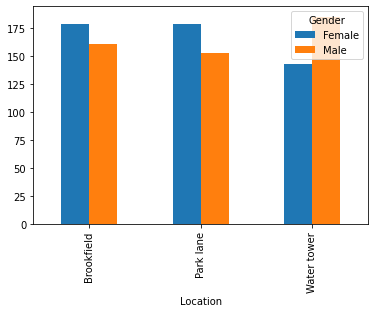

In [ ]:
# which branch has more VS less members
# which branch has highest VS lowest rating


In [37]:
members = Sales.groupby(['Member','Location']).count()['Invoice ID']
members

Member  Location   
No      Brookfield     173
        Park lane      167
        Water tower    159
Yes     Brookfield     167
        Park lane      165
        Water tower    169
Name: Invoice ID, dtype: int64

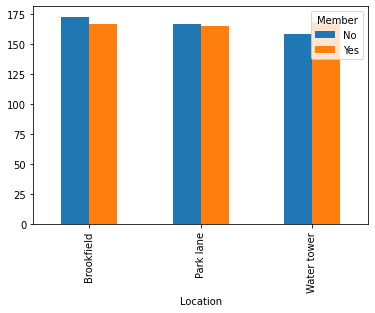

In [38]:
members.unstack(level=0).plot(kind="bar")
plt.show()

In [42]:
rating = Sales.groupby('Location').mean()['Rating']
rating

Location
Brookfield     2.782353
Park lane      3.021084
Water tower    3.118902
Name: Rating, dtype: float64

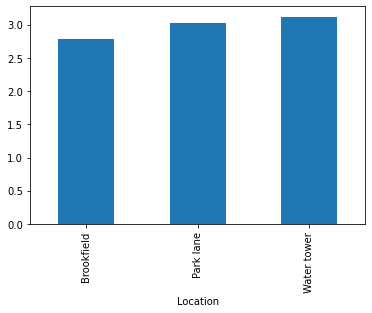

In [43]:
rating.plot(kind = 'bar')
plt.show()

In [ ]:
# which city has more female shopping
# who spends more men or women
# who spends more member or non member
# which product line sells more
# which product line is more popular

In [49]:
female_shoppers=Sales.groupby(['Gender','City']).count()['Invoice ID']

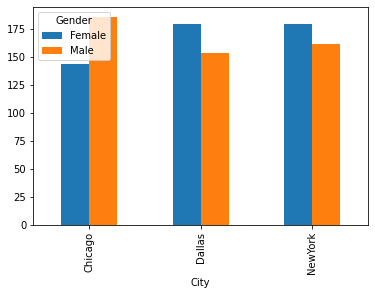

In [51]:
female_shoppers.unstack(level=0).plot(kind='bar')
plt.show()

In [53]:
spend=Sales.groupby('Gender').sum()['Total']

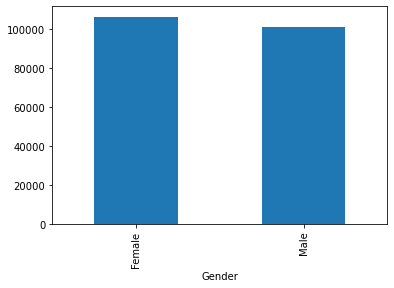

In [54]:
spend.plot(kind='bar')
plt.show()

In [55]:
member=Sales.groupby('Member').sum()['Total']
member


Member
No     100245
Yes    107543
Name: Total, dtype: int64

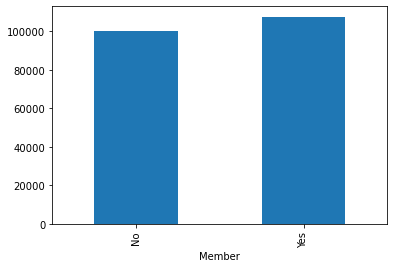

In [56]:
member.plot(kind='bar')
plt.show()

In [57]:
category_sales = Sales.groupby('Category').count()['Rating']

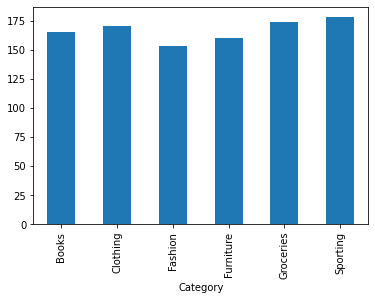

In [58]:
category_sales.plot(kind='bar')
plt.show()

In [59]:
sales_m_w = Sales.groupby(['Gender','Category']).count()['Rating']

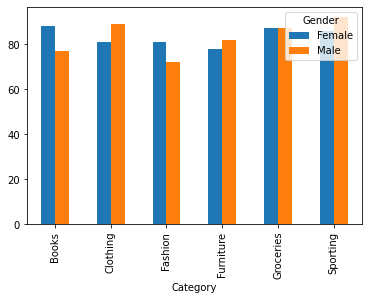

In [60]:
sales_m_w.unstack(level=0).plot(kind='bar')
plt.show()

In [ ]:
# Days make the best sales

In [67]:
Sales['Day']=pd.to_datetime(Sales['Date']).dt.day
Sales.head(5)

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18


In [68]:
day_sales = Sales.groupby('Day').sum()['Total']


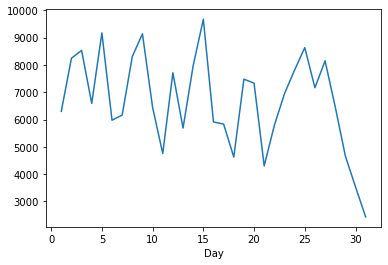

In [69]:
day_sales.plot()
plt.show()

In [70]:
Sales['Month']=pd.to_datetime(Sales['Date']).dt.month

In [71]:
month_sales = Sales.groupby('Month').sum()['Total']

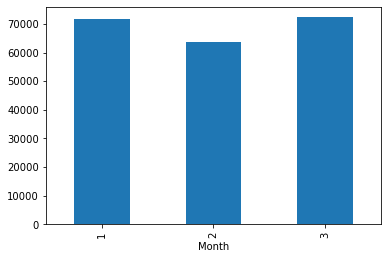

In [73]:
month_sales.plot(kind='bar')
plt.show()

# peaktime for sales

In [79]:
Sales['Hour']=pd.to_datetime(Sales['Time']).dt.hour

In [80]:
hourly_sales = Sales.groupby('Hour').sum()['Total']

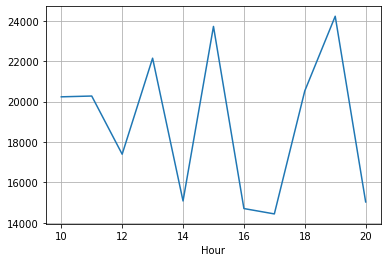

In [81]:
hourly_sales.plot(grid=True)
plt.show()

# what time people make more e-payment
# what time people make more cash-payment

In [82]:
Sales.groupby(['Hour','Payment']).count()['Invoice ID'].unstack(level=0)

Hour,10,11,12,13,14,15,16,17,18,19,20
Payment,,,,,,,,,,,
Card,29,25,27,35,22,37,23,28,25,34,26
Cash,35,36,27,37,32,38,31,21,29,32,26
Gpay,37,29,35,31,29,27,23,25,39,47,23
